## Toyota Car Price Prediction

Dalam Notebook ini, saya akan mengolah data tentang prediksi harga dari mobil Toyota berdasarkan fitur-fitur :

1) model = model dari jenis mobil

2) year = tahun pembuatan

3) price = harga

4) transmission = bagaimana mobil dikendarai

5) mileage = sudah berapa mile berjalan

6) fuelType = Jenis bahan bakar yang digunakan

7) tax = nominal pajak

8) mpg = 

9) enginesize = ukuran mesin mobil


In [1]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
df.nunique()

model             18
year              23
price           2114
transmission       4
mileage         5699
fuelType           4
tax               29
mpg               81
engineSize        16
dtype: int64

In [4]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.describe(include='O')

,model,transmission,fuelType
count,6738,6738,6738
unique,18,4,4
top,Yaris,Manual,Petrol
freq,2122,3826,4087


In [12]:
df.duplicated().any()

True

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
# Melihat statistik deksriptif 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,6699.0,2016.742797,2.205271,1998.0,2016.0,2017.0,2018.0,2020.0
price,6699.0,12529.799074,6358.562625,850.0,8266.5,10798.0,14995.0,59995.0
mileage,6699.0,22889.588745,19109.288501,2.0,9488.5,18571.0,31059.5,174419.0
tax,6699.0,94.549933,73.942649,0.0,0.0,135.0,145.0,565.0
mpg,6699.0,63.078728,15.861037,2.8,55.4,62.8,70.6,235.0
engineSize,6699.0,1.471996,0.435624,0.0,1.0,1.5,1.8,4.5


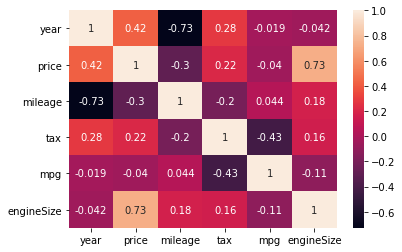

In [15]:
# Melihat korelasi antar fitur
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)

In [16]:
df_corr['price'].sort_values(ascending = False)

price         1.000000
engineSize    0.728791
year          0.422813
tax           0.215401
mpg          -0.039680
mileage      -0.300598
Name: price, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


In [18]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [19]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,model,object,0,0.0,18,"[ Yaris, Aygo]",0.27
1,year,int64,0,0.0,23,"[2016, 2017, 2019]",0.34
2,price,int64,0,0.0,2114,"[14695, 9995, 12500]",31.56
3,transmission,object,0,0.0,4,[Manual],0.06
4,mileage,int64,0,0.0,5699,"[49699, 25234, 2732]",85.07
5,fuelType,object,0,0.0,4,[Hybrid],0.06
6,tax,int64,0,0.0,29,"[0, 145, 20]",0.43
7,mpg,float64,0,0.0,81,"[69.0, 68.9, 78.0]",1.21
8,engineSize,float64,0,0.0,16,"[1.3, 1.0]",0.24


In [20]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [21]:
df['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [22]:
# mengatasi Dummy Variable Trap
df = pd.get_dummies(df, columns=['transmission','fuelType'], drop_first = True)


In [23]:
# mengatasi Dummy Variable Trap
df = pd.get_dummies(df, columns=['model'], drop_first = True)

In [24]:
df.head()

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,...,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris
0,2016,16000,24089,265,36.2,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,15995,18615,145,36.2,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,13998,27469,265,36.2,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,18998,14736,150,36.2,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,17498,36284,145,36.2,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
column_sets = ['engineSize', 'year', 'tax', 'mpg', 'mileage']
X = df.drop(columns=['price'])
y = df['price']

In [26]:
X

,year,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,...,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris
0,2016,24089,265,36.2,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,18615,145,36.2,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,27469,265,36.2,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,14736,150,36.2,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,36284,145,36.2,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,2011,30000,20,58.9,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6734,2011,36154,125,50.4,1.3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6735,2012,46000,125,57.6,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6736,2011,60700,125,50.4,1.3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


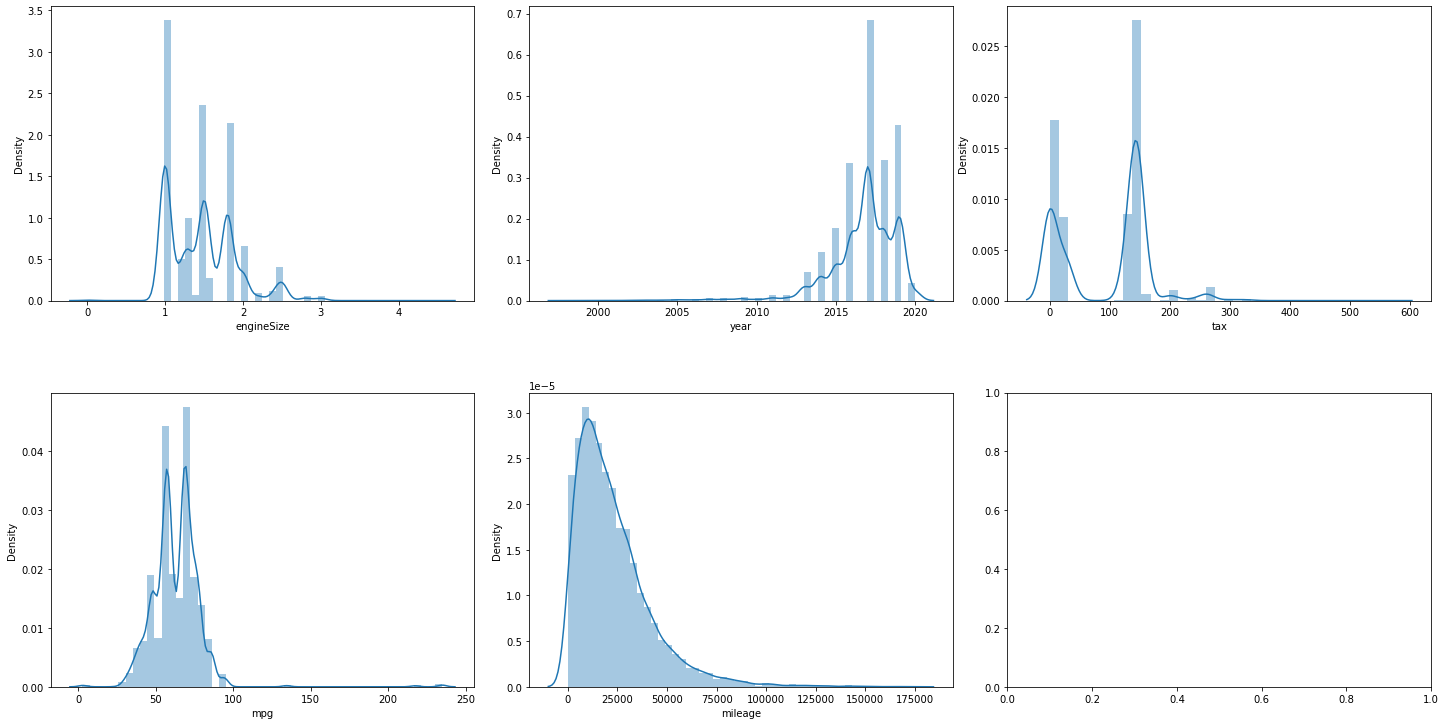

In [27]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k in column_sets:
        sns.distplot(X[k], ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [28]:
for k in column_sets:
    if (X[k].skew()) > 0.5 or (X[k].skew()) < -0.5:
        print(k,X[k].skew(),'------------> highly skewed')
    else:
        print(k,X[k].skew())

engineSize 0.834012833114001 ------------> highly skewed
year -2.214187981537263 ------------> highly skewed
tax 0.05245549745326195
mpg 3.4813857147246328 ------------> highly skewed
mileage 1.9102313367698172 ------------> highly skewed


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [30]:
y_test = pd.DataFrame(y_test)

In [31]:
print(y_train.shape)
print(y_test.shape)
print(y.shape[0]*0.2)

(5359,)
(1340, 1)
1339.8000000000002


In [32]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Training step

LinearRegression()

In [33]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)
# Fit and make the predictions by the model
mlr = sm.OLS(y_train, X_train2).fit() # Ordinary least squares
predictions = mlr.predict(X_test2)

# Print out the statistics
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2430.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:04:37   Log-Likelihood:                -47589.
No. Observations:                5359   AIC:                         9.524e+04
Df Residuals:                    5330   BIC:                         9.543e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.556e+06    3.3e+04    -47.121      0.000   -1.62e+06   -1.49e+06
year                     775.6044     16.377     47.360      0.000     743.499     807.710
mileage                   -0.0628      0.002    -33.159      0.000      -0.066      -0.059
tax                       -3.8846      0.417     -9.309      0.000      -4.703      -3.067
mpg                       -7.5432      2.375     -3.176      0.002     -12.199      -2.887
engineSize              3156.8658    194.818     16.204      0.000    2774.943    3538.788
transmission_Manual    -1217.3204     98.583    -12.348      0.000   -1410.583   -1024.058
transmission_Other       885.0144   1745.778      0.507      0.612   -2537.425    4307.454
transmission_Semi-Auto    68.9116    159.938      0.431      0.667    -244.632     382.455
fuelType_Hybrid         3274.5453    185.551     17.648      0.000    2910.789    3638.301
fuelType_Other          3000.0608    252.660     11.874      0.000    2504.744    3495.377
fuelType_Petrol         1704.5500    150.604     11.318      0.000    1409.304    1999.796
model_ Avensis          1311.6755    220.787      5.941      0.000     878.843    1744.508
model_ Aygo            -2640.1301    141.377    -18.674      0.000   -2917.286   -2362.974
model_ C-HR             5541.5910    119.713     46.291      0.000    5306.905    5776.277
model_ Camry            6974.3801    605.224     11.524      0.000    5787.894    8160.867
model_ Corolla          5013.1343    146.023     34.331      0.000    4726.870    5299.398
model_ GT86             5900.9093    277.718     21.248      0.000    5356.469    6445.350
model_ Hilux            8097.7183    337.603     23.986      0.000    7435.879    8759.558
model_ IQ               -170.8462    672.228     -0.254      0.799   -1488.689    1146.996
model_ Land Cruiser     2.293e+04    431.625     53.117      0.000    2.21e+04    2.38e+04
model_ PROACE VERSO     1.396e+04    528.792     26.402      0.000    1.29e+04     1.5e+04
model_ Prius            4971.6462    157.922     31.482      0.000    4662.055    5281.237
model_ RAV4             5039.7068    182.543     27.608      0.000    4681.848    5397.566
model_ Supra            3.025e+04    615.965     49.117      0.000     2.9e+04    3.15e+04
model_ Urban Cruiser    -235.3074   1013.821     -0.232      0.816   -2222.811    1752.196
model_ Verso            1237.8898    215.632      5.741      0.000     815.162    1660.617
model_ Verso-S          1342.0240   1748.077      0.768      0.443   -2084.922    4768.970
model_ Yaris           -1535.8651     96.177    -15.969      0.000   -1724.411   -1347.319
==============================================================================
Omnibus:                     2156.418   Durbin-Watson:                   2.057
Prob(Omnibus)

In [34]:
# Value of y intercept
model_lr.intercept_

-1555768.1171063122

In [35]:
# Model prediction on train data
y_pred_lr = model_lr.predict(X_train)

In [36]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_lr))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_lr))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_lr))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr)))

R^2: 0.9273432017481347
Adjusted R^2: 0.9269615150030968
MAE: 1091.5979086363973
MSE: 3024804.0900289933
RMSE: 1739.196392023912


In [37]:
# Prediksi tes data dengan model
y_test_pred_lr = model_lr.predict(X_test)

In [39]:
# Model Evaluation
acc_mlr2 = metrics.r2_score(y_test, y_test_pred_lr)
print('R^2:', acc_mlr2)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_lr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_lr))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr))

R^2: 0.9306746273666504
Adjusted R^2: 0.9291939939313081
MAE: 1062.5524427089276
MSE: 2467934.651575081
RMSE: 1570.966152269068


In [40]:
compare_mlr = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_lr, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['price']-compare_mlr['Prediction']
compare_mlr.head(20)

,price,Prediction
0,21700,6693.483505
1,8395,23878.908537
2,9975,6425.821143
3,10250,10100.467280
4,13000,9224.282540
5,6000,7553.987622
6,8495,14014.958488
7,9495,11669.868930
8,9370,3774.114377
9,10995,8982.957981


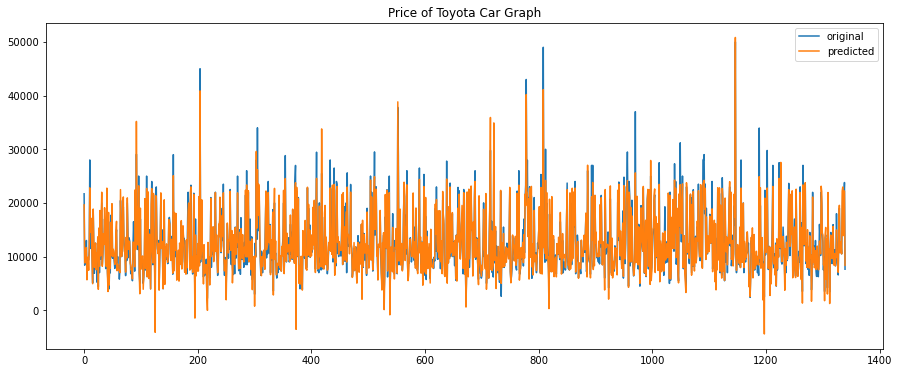

In [41]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_lr, label="predicted")
plt.title("Price of Toyota Car Graph")
plt.legend()
plt.show()

In [42]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
# Model prediction on train data
y_pred_rfg = reg.predict(X_train)

In [44]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_rfg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_rfg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_rfg)))

R^2: 0.9944201243462121
Adjusted R^2: 0.9943908116786124
MAE: 304.5724533835678
MSE: 232298.0244866163
RMSE: 481.9730536934781


In [45]:
# Prediksi tes data dengan model
y_test_pred_rfg = reg.predict(X_test)

In [46]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred_rfg)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_rfg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg)))
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg))

R^2: 0.9613328065769843
Adjusted R^2: 0.9605069626289717
MAE: 806.366986827766
MSE: 1376524.9706268432
RMSE: 1173.2540094228714


In [47]:
compare_rfg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_rfg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['price']-compare_mlr['Prediction']
compare_rfg.head(20)

,price,Prediction
0,21700,7519.69
1,8395,28685.09
2,9975,6263.43
3,10250,8733.97
4,13000,9174.07
5,6000,7531.53
6,8495,15071.65
7,9495,10540.02
8,9370,4663.71
9,10995,8942.61


In [48]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':reg.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
4,engineSize,0.574886
0,year,0.270717
1,mileage,0.043562
3,mpg,0.042869
19,model_ Land Cruiser,0.019802


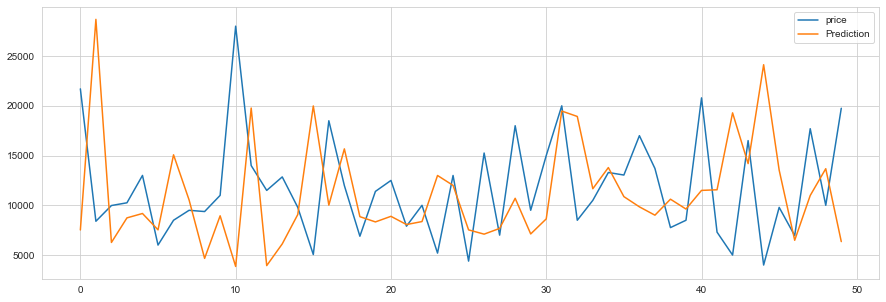

In [49]:
sns.set_style('whitegrid')
compare_rfg.head(50).plot(kind='line', figsize=(15, 5))

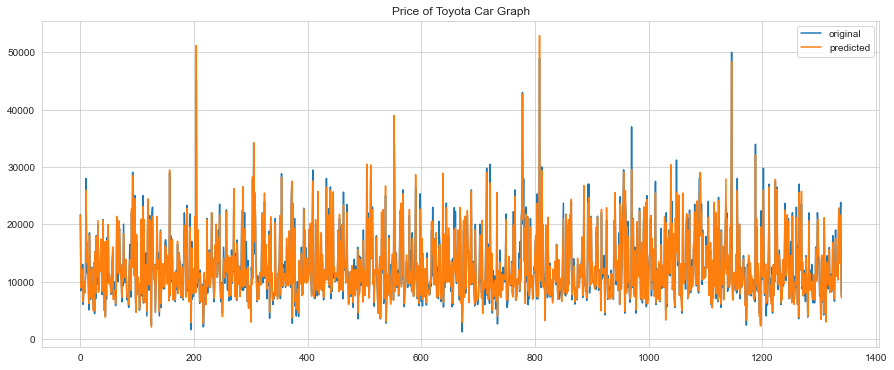

In [50]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_rfg, label="predicted")
plt.title("Price of Toyota Car Graph")
plt.legend()
plt.show()

In [51]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xbreg = XGBRegressor()

# Train the model using the training sets 
xbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
# Model prediction on train data
y_pred_xg = xbreg.predict(X_train)

In [53]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xg)))

R^2: 0.9903460315169794
Adjusted R^2: 0.9902953164855489
MAE: 459.227690266593
MSE: 401908.2048072742
RMSE: 633.9623055097788


In [54]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':xbreg.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
4,engineSize,0.526356
19,model_ Land Cruiser,0.132578
0,year,0.087210
13,model_ C-HR,0.065330
21,model_ Prius,0.029743


In [55]:
compare_xg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_xg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['price']-compare_mlr['Prediction']
compare_xg.head(20)

,price,Prediction
0,21700,7437.490234
1,8395,29028.369141
2,9975,6462.515625
3,10250,9082.537109
4,13000,9289.513672
5,6000,7917.200195
6,8495,15049.000000
7,9495,10682.387695
8,9370,4686.866699
9,10995,8935.260742


In [56]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_xg['price']-compare_xg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9616162087630675
Little to no autocorrelation 

Assumption satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 2.144756509038548e-23
Residuals are not normally distributed


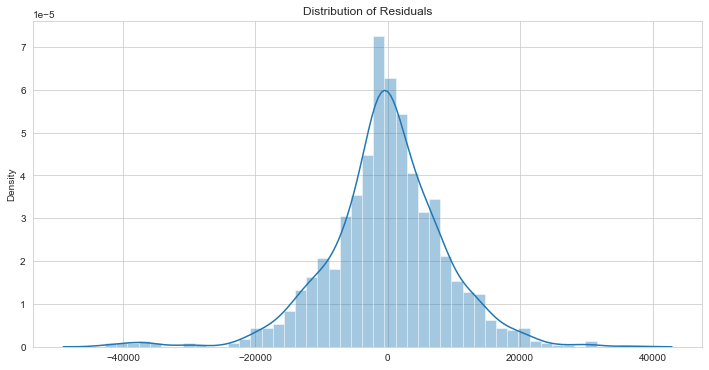


Assumption not satisfied


In [57]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_xg['price']-compare_xg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_xg['price']-compare_xg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

In [58]:
# Prediksi tes data dengan model
y_test_pred_xg = xbreg.predict(X_test)

In [59]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred_xg)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_xg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg)))
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg))

R^2: 0.9650712585469389
Adjusted R^2: 0.9643252594922587
MAE: 741.4190837803171
MSE: 1243438.702072671
RMSE: 1115.0958264080584


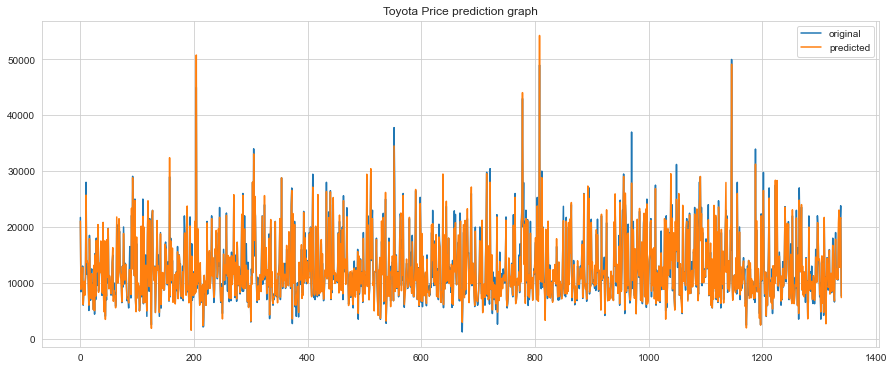

In [60]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_xg, label="predicted")
plt.title("Toyota Price prediction graph")
plt.legend()
plt.show()

In [61]:
# Membandingkan hasil dari modelling yang sudah dilakukan dari R^2 Score
models = pd.DataFrame({
    'Model': ['Multi Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_mlr2*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,96.507126
1,Random Forest,96.133281
0,Multi Linear Regression,93.067463


In [62]:
# Membandingkan hasil dari modelling yang sudah dilakukan dengan RMSE
models = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'RMSE Score': [rmse_rf, rmse_xgb]})
models.sort_values(by='RMSE Score', ascending=False)

,Model,RMSE Score
0,Random Forest,1173.254009
1,XGBoost,1115.095826


In [63]:
from sklearn.model_selection import cross_val_score, GridSearchCV
model = XGBRegressor(n_jobs=4)

parameters = {
    'n_estimators': [50, 100, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'gamma': [0.001, 0.01],
    'learning_rate': [0.01, 0.1],
    'booster': ['gbtree']
}

grid_obj = GridSearchCV(
    estimator=xbreg,
    param_grid=parameters
)

grid_obj.fit(X_train, y_train)

best_model = grid_obj.best_estimator_
print(best_model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [64]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xbht = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Train the model using the training sets 
xbht.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
# Model prediction on train data
y_pred_xgc = xbht.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xgc))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xgc))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xgc))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xgc))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xgc)))

R^2: 0.9859913493821906
Adjusted R^2: 0.9859177579718156
MAE: 551.1388145029645
MSE: 583199.7101998526
RMSE: 763.6751339410316


In [68]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':xbht.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
4,engineSize,0.467641
5,transmission_Manual,0.093271
0,year,0.089613
19,model_ Land Cruiser,0.085673
13,model_ C-HR,0.068904


In [69]:
compare_xg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_xgc, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['price']-compare_mlr['Prediction']
compare_xg.head(20)

,price,Prediction
0,21700,7578.485352
1,8395,28923.880859
2,9975,6520.711426
3,10250,9222.907227
4,13000,9540.527344
5,6000,7790.181152
6,8495,15417.575195
7,9495,10679.200195
8,9370,4577.664551
9,10995,9011.085938


In [70]:
# Prediksi tes data dengan model
y_test_pred_xgc = xbht.predict(X_test)
# Model Evaluation
acc_xgbht = metrics.r2_score(y_test, y_test_pred_xgc)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_xgc))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xgc))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_xgc))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgc)))
rmse_xght = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgc))

R^2: 0.9650712585469389
Adjusted R^2: 0.9660982419268821
MAE: 730.7984826842351
MSE: 1181641.6169102073
RMSE: 1087.0334019294014


### Kesimpulan Akhir
Berdasarkan model yang digunakan, bisa dipilih dari R^2 yang terbesar dan RMSE yang terkecil yaitu :
### XGBOOST Regression